<a href="https://colab.research.google.com/github/nestorpalacios/MVP1/blob/main/Aula_2_Tecnica_aplicada_gr%C3%A1fico_de_lineas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv('https://sidra.ibge.gov.br/geratabela?format=br.csv&name=tabela1286.csv&terr=N&rank=-&query=t/1286/n2/all/v/606/p/all/l/v,p,t', on_bad_lines='skip', skiprows=3, nrows=5, delimiter=';')

df

,Grande Região,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010
0,Norte,332847,476370,695112,1439052,1627608,2048696,2930005,4188313,6767249,10257266,12893561,15864454
1,Nordeste,4638560,6002047,6749507,11245921,14434080,17973413,22428873,28675110,35419156,42470225,47693253,53081950
2,Sudeste,4016922,6104384,7824011,13654934,18345831,22548494,31062978,40331969,52580527,62660700,72297351,80364410
3,Sul,721337,1430715,1796495,3537167,5735305,7840870,11892107,16683551,19380126,22117026,25089783,27386891
4,Centro-Oeste,220812,320399,373309,758531,1093491,1532924,2678380,4629640,7003515,9412242,11616745,14058094


In [3]:
dfix = pd.melt(df, id_vars = ["Grande Região"], 
                   var_name = "Ano",
                   value_name = "População")
dfix

,Grande Região,Ano,População
0,Norte,1872,332847
1,Nordeste,1872,4638560
2,Sudeste,1872,4016922
3,Sul,1872,721337
4,Centro-Oeste,1872,220812
5,Norte,1890,476370
6,Nordeste,1890,6002047
7,Sudeste,1890,6104384
8,Sul,1890,1430715
9,Centro-Oeste,1890,320399


In [4]:
dfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Grande Região  60 non-null     object
 1   Ano            60 non-null     object
 2   População      60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [5]:
cr_Nor = 'green'
cr_Nord = 'blue'
cr_Sud = 'red'
cr_Sul = 'gray'
cr_Cen_os = 'black'

plt.style.use("ggplot")

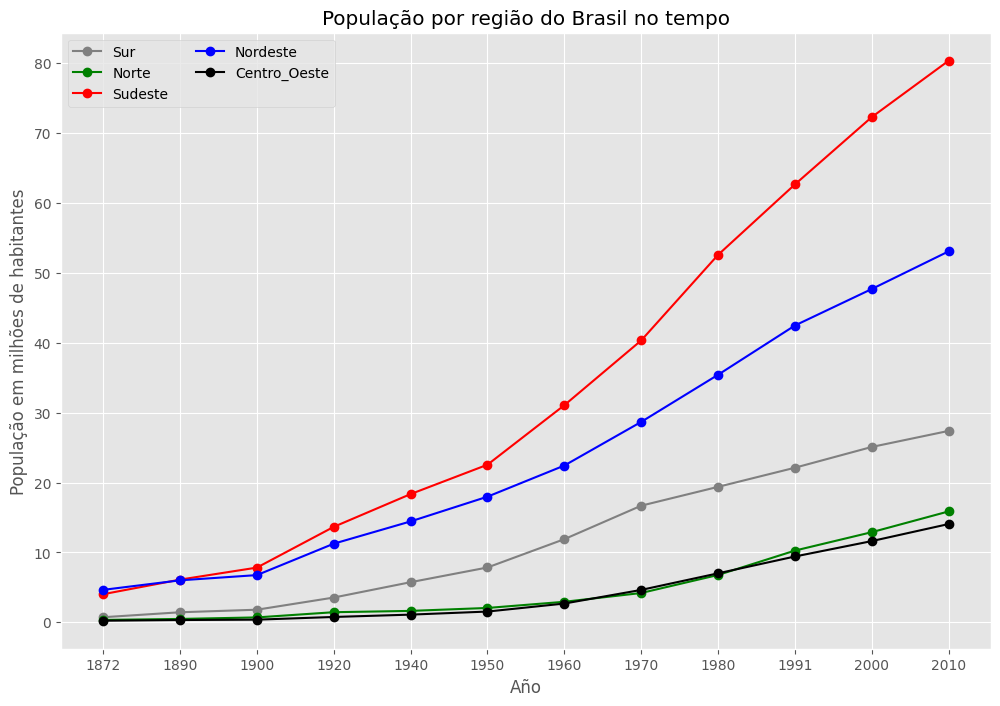

In [6]:
df_Sul = dfix[dfix['Grande Região'] == 'Sul'].copy()
df_Nor = dfix[dfix['Grande Região'] == 'Norte'].copy()
df_Sud = dfix[dfix['Grande Região'] == 'Sudeste'].copy()
df_Nord = dfix[dfix['Grande Região'] == 'Nordeste'].copy()
df_Cen_os = dfix[dfix['Grande Região'] == 'Centro-Oeste'].copy()

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(df_Sul['Ano'], df_Sul['População']/1e6, color = cr_Sul, marker = 'o', label = 'Sur')
ax.plot(df_Nor['Ano'], df_Nor['População']/1e6, color = cr_Nor, marker = 'o', label = 'Norte')
ax.plot(df_Sud['Ano'], df_Sud['População']/1e6, color = cr_Sud, marker = 'o', label = 'Sudeste')
ax.plot(df_Nord['Ano'], df_Nord['População']/1e6, color = cr_Nord, marker = 'o', label = 'Nordeste')
ax.plot(df_Cen_os['Ano'], df_Cen_os['População']/1e6, color = cr_Cen_os, marker = 'o', label = 'Centro_Oeste')

plt.savefig("linha-simples.svg")

plt.legend(loc = 'upper left', ncol = 2)

ax.set_title('População por região do Brasil no tempo')

ax.set_xlabel('Año')
ax.set_ylabel('População em milhões de habitantes') 

plt.show()